# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from collections import Counter
import nbformat

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
new_df = pd.read_csv('mission_launches.csv')
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df.shape

(4324, 9)

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [6]:
df.isna()
# df = df.dropna()
df.head()
df.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [7]:
df.drop_duplicates
df.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Descriptive Statistics

In [8]:
top_10_items = df['Organisation'].value_counts().head(10)
top_10_items = top_10_items.to_frame().reset_index()
top_10_items.columns = ['Organization', 'Launches']
top_10_items

,Organization,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [9]:
top_10_items.sort_values(by='Launches', ascending=True, inplace=True)
px.bar(x=top_10_items['Launches'], y=top_10_items['Organization'], orientation='h', color=top_10_items['Launches'], color_continuous_scale='tealrose')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [10]:
active_VS_unactive = df['Rocket_Status'].value_counts().head(2)
active_VS_unactive = active_VS_unactive.to_frame().reset_index()
active_VS_unactive.columns = ['Rocket_Status', 'Launches']
active = active_VS_unactive['Launches'][0]
unactive = active_VS_unactive['Launches'][1] 


In [11]:
print(active, unactive)
active_VS_unactive

3534 790


,Rocket_Status,Launches
0,StatusRetired,3534
1,StatusActive,790


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [12]:
rockets_successful_VS_unsuccessful = df['Mission_Status'].value_counts().head(2)
rockets_successful_VS_unsuccessful = rockets_successful_VS_unsuccessful.to_frame().reset_index()
rockets_successful_VS_unsuccessful.columns = ['Result', 'Result Times']


In [13]:
rockets_successful_VS_unsuccessful

,Result,Result Times
0,Success,3879
1,Failure,339


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

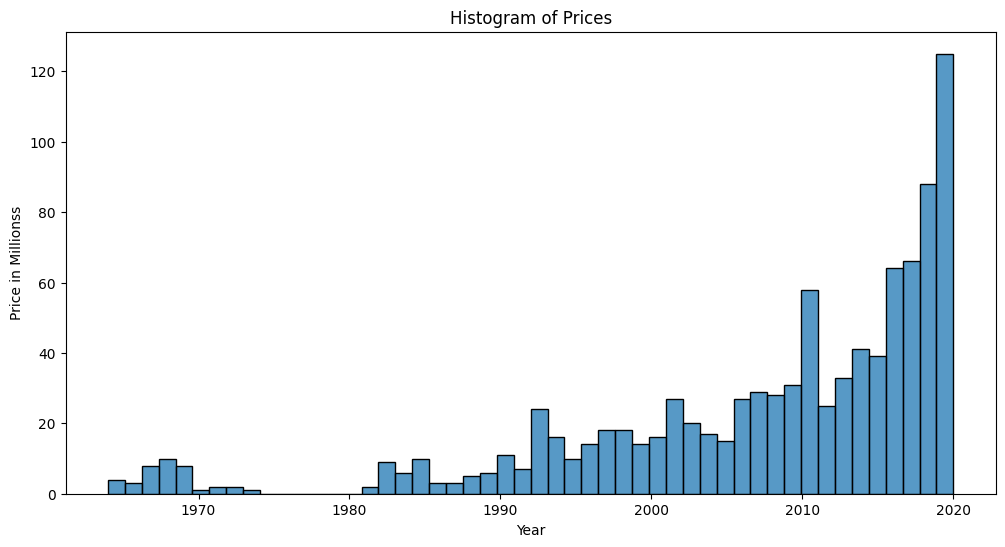

In [14]:
cleaner_df = df.dropna(subset=['Price'])
cleaner_df = cleaner_df[cleaner_df['Price'] != '']
cleaner_df['Price'] = cleaner_df['Price'].str.replace(',', '')
cleaner_df['Price'] = cleaner_df['Price'].astype(float)
decades=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
dates = []
for date in cleaner_df['Date']:
    date = int(str(date.split(',')[1][:5][1:]))
    dates.append(date)
dates
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaner_df['Price'], x=dates, bins=50)
plt.xlabel('Year')
plt.ylabel('Price in Millionss')
plt.title('Histogram of Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [15]:
country = []
countries2 = []
for loc in df['Location']:
    loc = loc.split(',')[-1][1:]
    if loc == 'Yellow Sea':
        loc = 'China'
    if loc == 'Gran Canaria':
        loc = 'USA'
    if loc == 'Pacific Missile Range Facility':
        loc = 'USA'
    if loc == 'Shahrud Missile Test Site':
        loc = 'Iran'
    country.append(loc)
for c in country:
    if c == 'USA':
        countries2.append(c)
        continue
    if c == 'Russia':
        countries2.append('RUS')
        continue
    for cc in countries:
        if cc[0] == c:
            countries2.append(cc[2])
# countries2

In [16]:
a = pd.Series(country)
b = pd.Series(countries2)

data = {'ISO': b}
dataframe = pd.DataFrame(data, columns=['ISO'])
# d = dataframe['ISO'].value_counts().head(10)
# d = d.to_frame().reset_index()
# d.columns = ['ISO', 'Count']
# dataframe = dataframe.dropna()
# for item in dataframe['Full_Country_Name']:
#     if item == 'France':
#         print('FFF')
#     if item == 'India':
#         print('III')
#     if item == 'Russia':
#         print('RRR')
# print(a)
# print(b)
# count = d['Count']
dataframe.groupby(['ISO'], as_index=False).size()


,ISO,size
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,ISR,11
6,JPN,126
7,KAZ,701
8,KEN,9
9,NZL,13


In [17]:
px.choropleth(dataframe.groupby(['ISO'], as_index=False).size(), locations='ISO', color='size', color_continuous_scale='redor').update_layout(margin=dict(l=20, r=20, t=5, b=5),width=700, height=350, title_text='Rockets flown from Countries', title_x=0.45, title_y=0.99)

# Use a Choropleth Map to Show the Number of Failures by Country


In [18]:
country2 = []
countries3 = []
for loc in df['Location']:
    loc = loc.split(',')[-1][1:]
    if loc == 'Yellow Sea':
        loc = 'China'
    if loc == 'Gran Canaria':
        loc = 'USA'
    if loc == 'Pacific Missile Range Facility':
        loc = 'USA'
    country2.append(loc)
for c in country:
    if c == 'USA':
        countries3.append(c)
        continue
    elif c == 'Russia':
        countries3.append('RUS')
        continue
    elif c == 'India':
        countries3.append('IND')
        continue
    elif c == 'France':
        countries3.append('FRA')
        continue
    for cc in countries:
        if cc[0] == c:
            countries3.append(cc[2])
b2 = pd.Series(countries3)
failures1 = []
for entry in df['Mission_Status']:
    if entry == 'Failure':
        failures1.append(entry)
print(failures1)
failures2 = pd.Series(failures1)
print(failures2)
data1 = {'ISO': b2, 'Failures': failures2}
dataframe2 = pd.DataFrame(data1, columns=['ISO', 'Failures'])
dataframe2.groupby(['ISO', 'Failures'], as_index=False).size()

['Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure', 'Failure'

,ISO,Failures,size
0,CHN,Failure,108
1,FRA,Failure,27
2,IND,Failure,16
3,ISR,Failure,1
4,JPN,Failure,14
5,KAZ,Failure,39
6,NZL,Failure,12
7,RUS,Failure,25
8,USA,Failure,97


In [19]:
px.choropleth(dataframe2.groupby(['ISO', 'Failures'], as_index=False).size(), locations='ISO', color='size', color_continuous_scale='sunsetdark').update_layout(margin=dict(l=20, r=20, t=5, b=5), width=700, height=350, title_text='How many times each country failed', title_x=0.45, title_y=0.99)


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [20]:
countries = []
organisations= []
mission_status = []
for bruh,data in df.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Yellow Sea':
        loc = 'China'
    if loc == 'Gran Canaria':
        loc = 'USA'
    if loc == 'Pacific Missile Range Facility':
        loc = 'USA'
    countries.append(loc)
    organisations.append(data['Organisation'])
    mission_status.append(data['Mission_Status'])
countries = pd.Series(countries)
organisations = pd.Series(organisations)
mission_status = pd.Series(mission_status)
countries
organisations
mission_status
data = {'Country_Name': countries, 'Organisations': organisations, 'Mission_Status': mission_status}
sunburst_dataframe = pd.DataFrame(data, columns=['Country_Name', 'Organisations', 'Mission_Status'])
sunburst_dataframe

,Country_Name,Organisations,Mission_Status
0,USA,SpaceX,Success
1,China,CASC,Success
2,USA,SpaceX,Success
3,Kazakhstan,Roscosmos,Success
4,USA,ULA,Success
...,...,...,...
4319,USA,US Navy,Failure
4320,USA,AMBA,Success
4321,USA,US Navy,Failure
4322,Kazakhstan,RVSN USSR,Success


In [21]:
sun_data1 = sunburst_dataframe.groupby(['Country_Name', 'Organisations', 'Mission_Status'], as_index=False).value_counts()
# sun_data1.sort_values(by='size', ascending=False)
# sun_data1

In [22]:
fig = px.sunburst(sun_data1, path=['Country_Name', 'Organisations', 'Mission_Status', 'count'], title='Sunburst Chart: Rockets flown by Country/Organisation/Mission Status/Count').update_layout(title_x=0.5, width=1000)
fig['layout']['title']['font'] = dict(color='#0096FF')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [23]:
countries = []
organisations= []
mission_status = []
for bruh,data in df.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Yellow Sea':
        loc = 'China'
    if loc == 'Gran Canaria':
        loc = 'USA'
    if loc == 'Pacific Missile Range Facility':
        loc = 'USA'
    countries.append(loc)
    organisations.append(data['Organisation'])
    mission_status.append(float(str(data['Price']).replace(',', '')))
countries = pd.Series(countries)
organisations = pd.Series(organisations)
mission_status = pd.Series(mission_status)
countries
organisations
mission_status
data = {'Organisations': organisations, 'Price In Millions': mission_status}
sunburst_dataframe = pd.DataFrame(data, columns=['Organisations', 'Price In Millions'])
sunburst_dataframe

,Organisations,Price In Millions
0,SpaceX,50.00
1,CASC,29.75
2,SpaceX,NaN
3,Roscosmos,65.00
4,ULA,145.00
...,...,...
4319,US Navy,NaN
4320,AMBA,NaN
4321,US Navy,NaN
4322,RVSN USSR,NaN


In [24]:
sun_data1 = sunburst_dataframe.groupby(['Organisations'], as_index=False).sum()
# sun_data1.sort_values(by='size', ascending=False)
sun_data1

,Organisations,Price In Millions
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
8,CASIC,0.00
9,CECLES,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [25]:
sun_data1 = sunburst_dataframe.groupby(['Organisations'], as_index=False).mean()
sun_data1.dropna().reset_index()

,index,Organisations,Price In Millions
0,3,Arianespace,170.26
1,6,Boeing,177.29
2,7,CASC,40.13
3,12,EER,20.00
4,13,ESA,37.00
5,14,Eurockot,41.80
6,15,ExPace,28.30
7,19,ILS,101.54
8,23,ISRO,32.49
9,24,JAXA,56.00


# Chart the Number of Launches per Year

In [26]:
dates = []
launches = []
for d,data in df.iterrows():
    date = str(data['Date'].split(',')[1][:5][1:])
    dates.append(date)

df['Year'] = pd.Series(dates)
year_counts = df['Year'].to_frame().dropna().value_counts().reset_index()
year_counts

,Year,count
0,1971,119
1,2018,117
2,1977,114
3,1976,113
4,1975,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [27]:
bar = px.bar(x=year_counts['Year'], y=year_counts['count'], color=year_counts['count'], color_continuous_scale='plasma')
bar.update_layout(xaxis_title = 'Number of Launches', yaxis_title = 'Year', font_size=6.23, title_x=0.5)


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [28]:
dates = []
launches = []
for d,data in df.iterrows():
    date = str(data['Date'][4:][:3])
    dates.append(date)

df['Month'] = pd.Series(dates)
month_counts = df['Month'].to_frame().dropna().value_counts().reset_index()
month_counts

,Month,count
0,Dec,450
1,Jun,402
2,Apr,383
3,Oct,381
4,Aug,373
5,Sep,365
6,Mar,353
7,Jul,351
8,Feb,336
9,Nov,336


In [32]:
bar = px.bar(x=month_counts['Month'], y=month_counts["count"], color=month_counts["count"], color_continuous_scale='oryel')
bar.update_layout(xaxis_title = 'Month', yaxis_title = 'Number of Launches', font_size=6.23)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# prices = []
# dates = []
# for item,data in cleaner_df.iterrows():
#     prices.append(int(float(str(data['Price']).replace(',',''))))
#     date = str(data['Date'].split(',')[1][:5][1:])
#     dates.append(date)

# prices = pd.Series(prices)
# dates = pd.Series(dates)
# price_df = pd.DataFrame({'prices': prices, 'dates': dates}, columns=['prices', 'dates'])
# # dates2 = pd.Series(['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'])
# price_df = price_df.sort_values('dates', ascending=True)
# price_df
dates=[]
prices = []
for bruh,data in df.dropna().iterrows():
    dates.append(str(data['Date'].split(',')[1][:5][1:]))
    prices.append(int(float(str(data['Price']).replace(',',''))))
dates = pd.Series(dates)
prices = pd.Series(prices)
data = {'Dates': dates, 'Prices': prices}
sunburst_dataframe = pd.DataFrame(data, columns=['Dates', 'Prices'])
sunburst_dataframe
sun_data1 = sunburst_dataframe.groupby(['Dates'], as_index=False).mean()
sun_data1.dropna()

,Dates,Prices
0,1964,63.00
1,1965,63.00
2,1966,59.00
3,1967,196.62
4,1968,279.20
5,1969,609.50
6,1970,"1,160.00"
7,1971,"1,160.00"
8,1972,"1,160.00"
9,1973,"1,160.00"


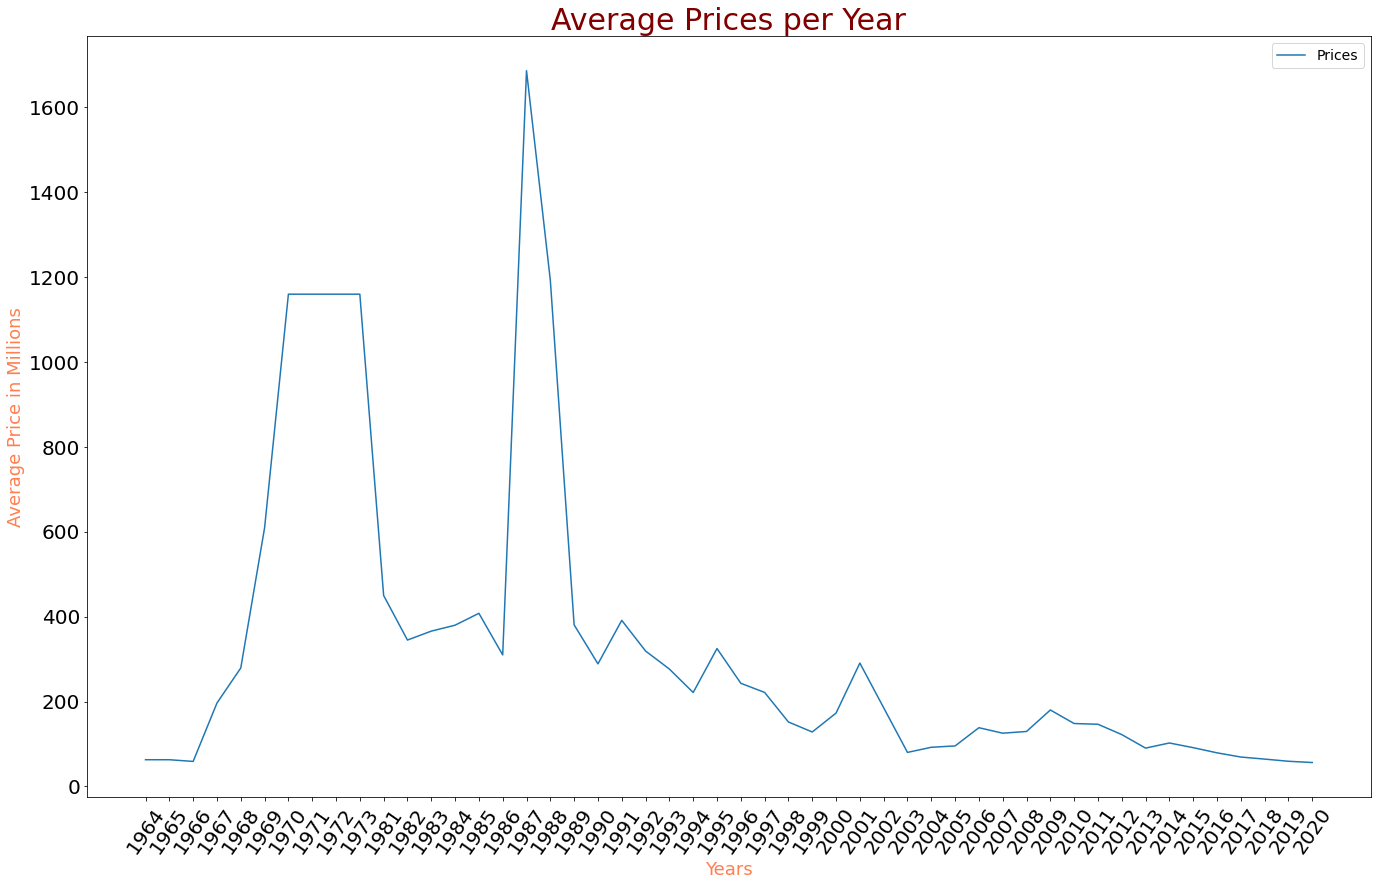

In [ ]:
plt.figure(figsize=(23, 14))
plt.xticks(fontsize=20, rotation=55)
plt.yticks(fontsize=20)
plt.plot(sun_data1['Dates'], sun_data1['Prices'])
plt.legend(['Prices'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Average Price in Millions', fontsize=18, color='coral')
plt.title('Average Prices per Year', fontsize=30, color='maroon')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,p,q,r,s,t,u = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
for bruh,data in df.iterrows():
    o = data['Organisation']
    if o == 'NASA':
        a.append(int(str(data['Date'].split(',')[1][:5][1:])))
        b.append(o)
    if o == 'Arianespace':
        c.append(int(str(data['Date'].split(',')[1][:5][1:])))
        d.append(o)
    if o == 'RVSN USSR':
        e.append(int(str(data['Date'].split(',')[1][:5][1:])))
        f.append(o)
    if o == 'General Dynamics':
        g.append(int(str(data['Date'].split(',')[1][:5][1:])))
        h.append(o)
    if o == 'CASC':
        i.append(int(str(data['Date'].split(',')[1][:5][1:])))
        j.append(o)
    if o == 'VKS RF':
        k.append(int(str(data['Date'].split(',')[1][:5][1:])))
        l.append(o)
    if o == 'US Air Force':
        m.append(int(str(data['Date'].split(',')[1][:5][1:])))
        n.append(o)
    if o == 'ULA':
        p.append(int(str(data['Date'].split(',')[1][:5][1:])))
        q.append(o)
    if o == 'Boeing':
        r.append(int(str(data['Date'].split(',')[1][:5][1:])))
        s.append(o)
    if o == 'Martin Marietta':
        t.append(int(str(data['Date'].split(',')[1][:5][1:])))
        u.append(o)
a = pd.DataFrame({'Dates': a, 'Organisation': b}, columns=['Dates', 'Organisation'])
a.sort_values('Dates', ascending=True)
a = a.value_counts().to_frame().reset_index()
a = a.sort_values('Dates', ascending=True)
b = pd.DataFrame({'Dates': c, 'Organisation': d}, columns=['Dates', 'Organisation'])
b = b.sort_values('Dates', ascending=True)
b = b.value_counts().to_frame().reset_index()
b = b.sort_values('Dates', ascending=True)
c = pd.DataFrame({'Dates': e, 'Organisation': f}, columns=['Dates', 'Organisation'])
c.sort_values('Dates', ascending=True)
c = c.value_counts().to_frame().reset_index()
c = c.sort_values('Dates', ascending=True)
d = pd.DataFrame({'Dates': g, 'Organisation': h}, columns=['Dates', 'Organisation'])
d.sort_values('Dates', ascending=True)
d = d.value_counts().to_frame().reset_index()
d = d.sort_values('Dates', ascending=True)
e = pd.DataFrame({'Dates': i, 'Organisation': j}, columns=['Dates', 'Organisation'])
e.sort_values('Dates', ascending=True)
e = e.value_counts().to_frame().reset_index()
e = e.sort_values('Dates', ascending=True)
f = pd.DataFrame({'Dates': k, 'Organisation': l}, columns=['Dates', 'Organisation'])
f.sort_values('Dates', ascending=True)
f = f.value_counts().to_frame().reset_index()
f = f.sort_values('Dates', ascending=True)
g = pd.DataFrame({'Dates': m, 'Organisation': n}, columns=['Dates', 'Organisation'])
g.sort_values('Dates', ascending=True)
g = g.value_counts().to_frame().reset_index()
g = g.sort_values('Dates', ascending=True)
h = pd.DataFrame({'Dates': p, 'Organisation': q}, columns=['Dates', 'Organisation'])
h.sort_values('Dates', ascending=True)
h = h.value_counts().to_frame().reset_index()
h = h.sort_values('Dates', ascending=True)
i = pd.DataFrame({'Dates': r, 'Organisation': s}, columns=['Dates', 'Organisation'])
i.sort_values('Dates', ascending=True)
i = i.value_counts().to_frame().reset_index()
i = i.sort_values('Dates', ascending=True)
j = pd.DataFrame({'Dates': t, 'Organisation': u}, columns=['Dates', 'Organisation'])
j.sort_values('Dates', ascending=True)
j = j.value_counts().to_frame().reset_index()
j = j.sort_values('Dates', ascending=True)

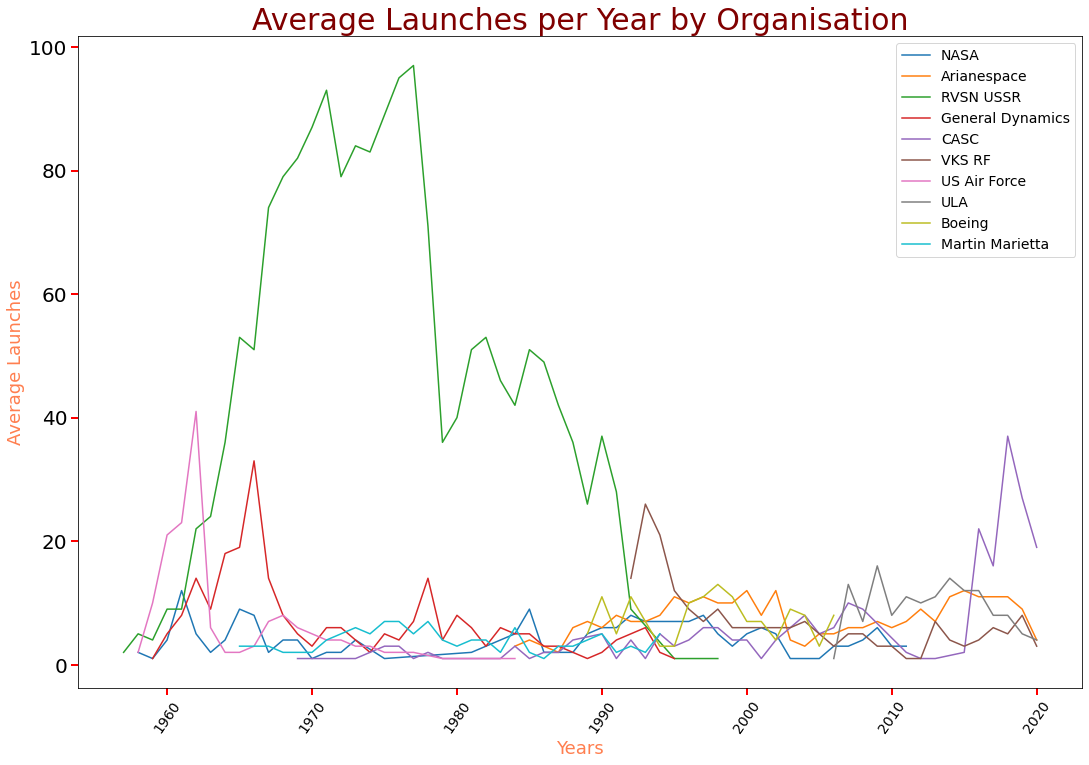

In [ ]:
plt.figure(figsize=(18, 12))
plt.xticks(fontsize=14, rotation=55)
plt.yticks(fontsize=20)
plt.plot(a['Dates'], a[0])
plt.plot(b['Dates'], b[0])
plt.plot(c['Dates'], c[0])
plt.plot(d['Dates'], d[0])
plt.plot(e['Dates'], e[0])
plt.plot(f['Dates'], f[0])
plt.plot(g['Dates'], g[0])
plt.plot(h['Dates'], h[0])
plt.plot(i['Dates'], i[0])
plt.plot(j['Dates'], j[0])
plt.tick_params(length=7, width=2, color='red')
plt.legend(['NASA', 'Arianespace', 'RVSN USSR', 'General Dynamics', 'CASC', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Average Launches', fontsize=18, color='coral')
plt.title('Average Launches per Year by Organisation', fontsize=30, color='maroon')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cold_war_dataset = df[1717:]
cold_war_dataset

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
1717,1717,1717,CASC,"LC-3, Xichang Satellite Launch Center, China","Sat Dec 28, 1991 12:00 UTC",Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,1991,Dec
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991,Dec
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1991,Dec
1720,1720,1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Mon Dec 16, 1991 22:19 UTC","Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,1991,Dec
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991,Dec
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958,Feb
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,Dec
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,Nov


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
countries = []
for bruh,data in cold_war_dataset.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Gran Canaria':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'Pacific Missile Range Facility':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'USA':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'Russia':
        loc = 'USSR'
        countries.append(loc)
    elif loc == 'Kazakhstan':
        loc = 'USSR'
        countries.append(loc)
countries = pd.Series(countries)
countries
data = {'Country_Name': countries}
US_USSR = pd.DataFrame(data, columns=['Country_Name'])
US_USSR = US_USSR.value_counts().to_frame().reset_index()
countries = []
for bruh,data in df.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Gran Canaria':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'Pacific Missile Range Facility':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'USA':
        loc = 'USA'
        countries.append(loc)
    elif loc == 'Russia':
        loc = 'USSR'
        countries.append(loc)
    elif loc == 'Kazakhstan':
        loc = 'USSR'
        countries.append(loc)
countries = pd.Series(countries)
countries
data = {'Country_Name': countries}
US_USSR2 = pd.DataFrame(data, columns=['Country_Name'])
US_USSR2 = US_USSR2.value_counts().to_frame().reset_index()

In [ ]:
px.pie(labels=['USSR','USA'], values=US_USSR[0],title='USA VS USSR in Rocket Launches During Cold War',names=['USSR', 'USA']).update_traces().update_layout(title_x=0.5).show()
px.pie(labels=['USSR','USA'], values=US_USSR2[0],title='USA VS Russia and Old USSR in Rocket Launches Overall',names=['USSR', 'USA']).update_traces().update_layout(title_x=0.5).show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
USAs = []
USSRs = []
USA_dates = []
USSR_dates = []
for bruh,data in cold_war_dataset.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Gran Canaria':
        loc = 'USA'
        USAs.append(loc)
        USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Pacific Missile Range Facility':
        loc = 'USA'
        USAs.append(loc)
        USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'USA':
        loc = 'USA'
        USAs.append(loc)
        USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Russia':
        loc = 'USSR'
        USSRs.append(loc)
        USSR_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Kazakhstan':
        loc = 'USSR'
        USSRs.append(loc)
        USSR_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
countries = pd.Series(countries)
countries
data = {'Country_Name': USAs, 'Dates': USA_dates}
USA = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USA = USA.value_counts().to_frame().reset_index()
USA = USA.sort_values(by='Dates', ascending=True)
data = {'Country_Name': USSRs, 'Dates': USSR_dates}
USSR = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USSR = USSR.value_counts().to_frame().reset_index()
USSR = USSR.sort_values(by='Dates', ascending=True)
USSR['Dates']
USAs2 = []
USSRs2 = []
USA_dates2 = []
USSR_dates2 = []
for bruh,data in df.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'Gran Canaria':
        loc = 'USA'
        USAs2.append(loc)
        USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Pacific Missile Range Facility':
        loc = 'USA'
        USAs2.append(loc)
        USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'USA':
        loc = 'USA'
        USAs2.append(loc)
        USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Russia':
        loc = 'USSR'
        USSRs2.append(loc)
        USSR_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
    elif loc == 'Kazakhstan':
        loc = 'USSR'
        USSRs2.append(loc)
        USSR_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
countries = pd.Series(countries)
countries
data = {'Country_Name': USAs2, 'Dates': USA_dates2}
USA2 = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USA2 = USA2.value_counts().to_frame().reset_index()
USA2 = USA2.sort_values(by='Dates', ascending=True)
data = {'Country_Name': USSRs2, 'Dates': USSR_dates2}
USSR2 = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USSR2 = USSR2.value_counts().to_frame().reset_index()
USSR2 = USSR2.sort_values(by='Dates', ascending=True)
USSR2['Dates']

62    1957
60    1958
61    1959
49    1960
48    1961
      ... 
35    2016
34    2017
36    2018
32    2019
45    2020
Name: Dates, Length: 64, dtype: int64

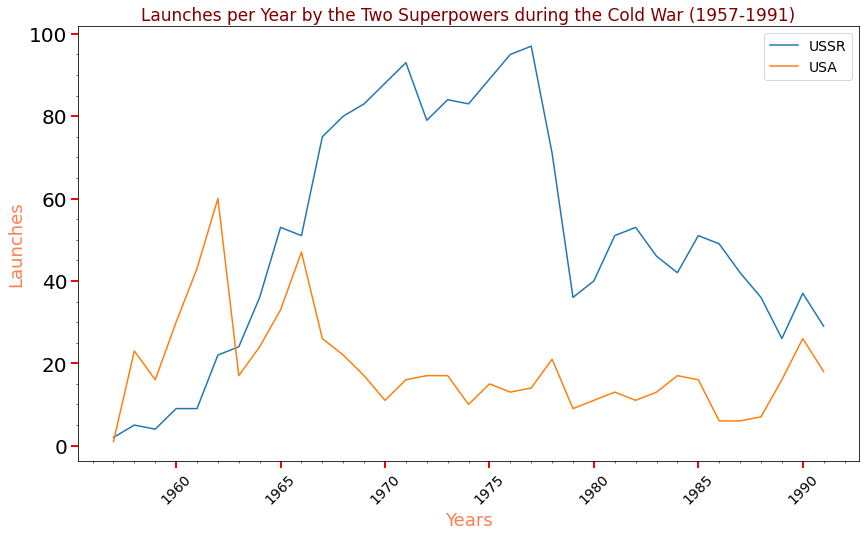

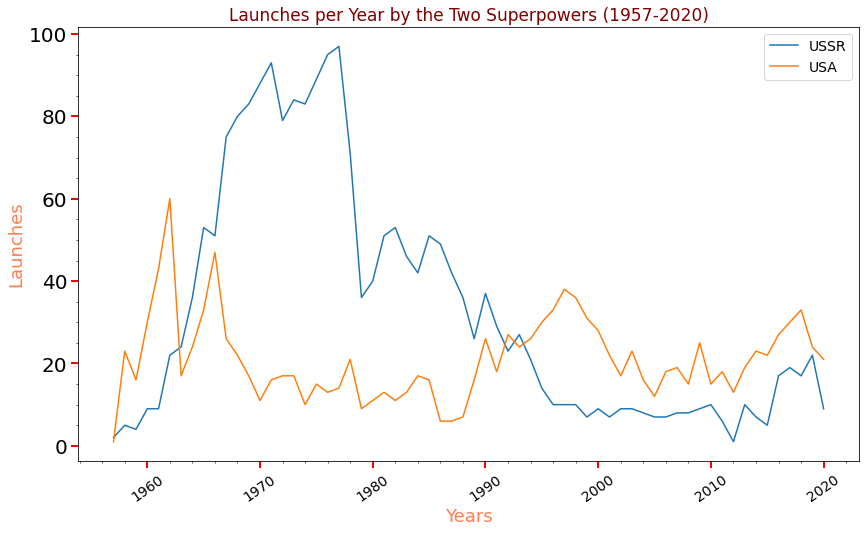

In [ ]:
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=20)
plt.plot(USSR['Dates'], USSR[0])
plt.plot(USA['Dates'], USA[0])
ticker.IndexLocator(base=5, offset=1957)
plt.minorticks_on()
plt.legend(['USSR', 'USA'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Launches', fontsize=18, color='coral')
plt.tick_params(length=7, width=2, color='red')
plt.title('Launches per Year by the Two Superpowers during the Cold War (1957-1991)', fontsize=17, color='maroon')
plt.show()
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=35)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.plot(USSR2['Dates'], USSR2[0])
plt.plot(USA2['Dates'], USA2[0])
plt.legend(['USSR', 'USA'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Launches', fontsize=18, color='coral')
plt.tick_params(length=7, width=2, color='red')
plt.title('Launches per Year by the Two Superpowers (1957-2020)', fontsize=17, color='maroon')
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
USAs = []
USSRs = []
USA_dates = []
USSR_dates = []
for bruh,data in cold_war_dataset.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if data['Mission_Status'] == 'Failure':
        if loc == 'Gran Canaria':
            loc = 'USA'
            USAs.append(loc)
            USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Pacific Missile Range Facility':
            loc = 'USA'
            USAs.append(loc)
            USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'USA':
            loc = 'USA'
            USAs.append(loc)
            USA_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Russia':
            loc = 'USSR'
            USSRs.append(loc)
            USSR_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Kazakhstan':
            loc = 'USSR'
            USSRs.append(loc)
            USSR_dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
countries = pd.Series(countries)
countries
data = {'Country_Name': USAs, 'Dates': USA_dates}
USA = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USA = USA.value_counts().to_frame().reset_index()
USA = USA.sort_values(by='Dates', ascending=True)
data = {'Country_Name': USSRs, 'Dates': USSR_dates}
USSR = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USSR = USSR.value_counts().to_frame().reset_index()
USSR = USSR.sort_values(by='Dates', ascending=True)
USSR['Dates']
USAs2 = []
USSRs2 = []
USA_dates2 = []
USSR_dates2 = []
for bruh,data in df.iterrows():
    loc = data['Location'].split(',')[-1][1:]
    if data['Mission_Status'] == 'Failure':
        if loc == 'Gran Canaria':
            loc = 'USA'
            USAs2.append(loc)
            USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Pacific Missile Range Facility':
            loc = 'USA'
            USAs2.append(loc)
            USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'USA':
            loc = 'USA'
            USAs2.append(loc)
            USA_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Russia':
            loc = 'USSR'
            USSRs2.append(loc)
            USSR_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
        elif loc == 'Kazakhstan':
            loc = 'USSR'
            USSRs2.append(loc)
            USSR_dates2.append(int(str(data['Date'].split(',')[1][:5][1:])))
countries = pd.Series(countries)
countries
data = {'Country_Name': USAs2, 'Dates': USA_dates2}
USA2 = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USA2 = USA2.value_counts().to_frame().reset_index()
USA2 = USA2.sort_values(by='Dates', ascending=True)
data = {'Country_Name': USSRs2, 'Dates': USSR_dates2}
USSR2 = pd.DataFrame(data, columns=['Country_Name', 'Dates'])
USSR2 = USSR2.value_counts().to_frame().reset_index()
USSR2 = USSR2.sort_values(by='Dates', ascending=True)
USSR2['Dates']


12    1958
37    1959
5     1960
15    1961
4     1962
1     1963
6     1964
10    1965
7     1966
2     1967
11    1968
0     1969
8     1970
3     1971
9     1972
14    1973
13    1974
16    1975
38    1976
17    1977
30    1981
19    1982
36    1983
18    1985
35    1986
34    1989
33    1990
22    1991
32    1992
31    1994
23    1995
29    1997
28    1998
21    2000
20    2005
27    2006
26    2013
25    2016
24    2017
39    2018
Name: Dates, dtype: int64

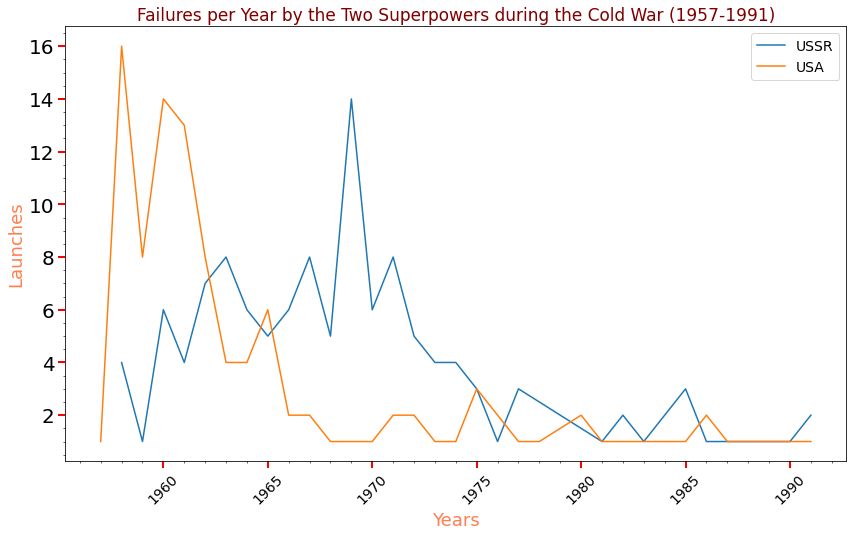

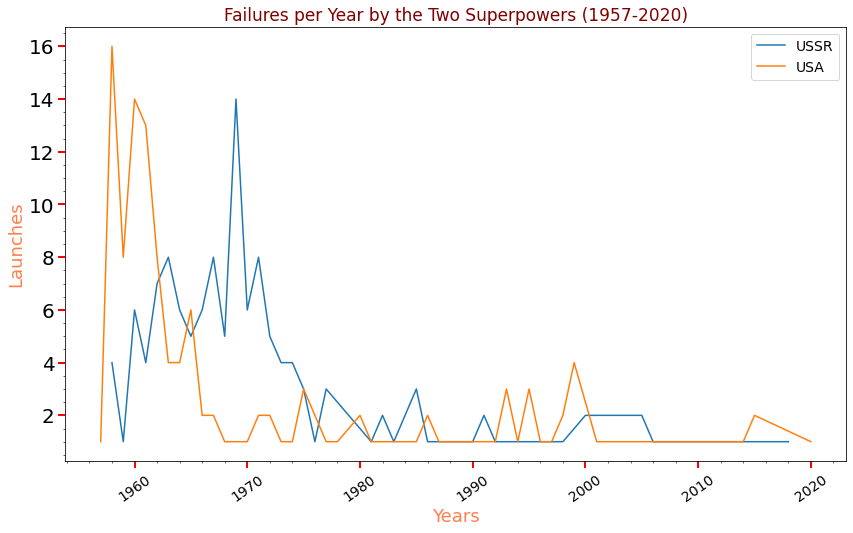

In [ ]:
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=20)
plt.plot(USSR['Dates'], USSR[0])
plt.plot(USA['Dates'], USA[0])
ticker.IndexLocator(base=5, offset=1957)
plt.minorticks_on()
plt.legend(['USSR', 'USA'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Launches', fontsize=18, color='coral')
plt.tick_params(length=7, width=2, color='red')
plt.title('Failures per Year by the Two Superpowers during the Cold War (1957-1991)', fontsize=17, color='maroon')
plt.show()
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=35)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.plot(USSR2['Dates'], USSR2[0])
plt.plot(USA2['Dates'], USA2[0])
plt.legend(['USSR', 'USA'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Launches', fontsize=18, color='coral')
plt.tick_params(length=7, width=2, color='red')
plt.title('Failures per Year by the Two Superpowers (1957-2020)', fontsize=17, color='maroon')
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
dates = []
for bruh,data in df.iterrows():
    if data['Mission_Status'] == 'Failure':
        dates.append(int(str(data['Date'].split(',')[1][:5][1:])))
dates = pd.Series(dates)
data = {'Dates': USA_dates2}
failures = pd.DataFrame(data, columns=['Dates'])
failures = failures.value_counts().to_frame().reset_index()
failures = failures.sort_values(by='Dates', ascending=True)
failures

,Dates,0
22,1957,1
0,1958,16
3,1959,8
1,1960,14
2,1961,13
4,1962,8
6,1963,4
7,1964,4
5,1965,6
19,1966,2


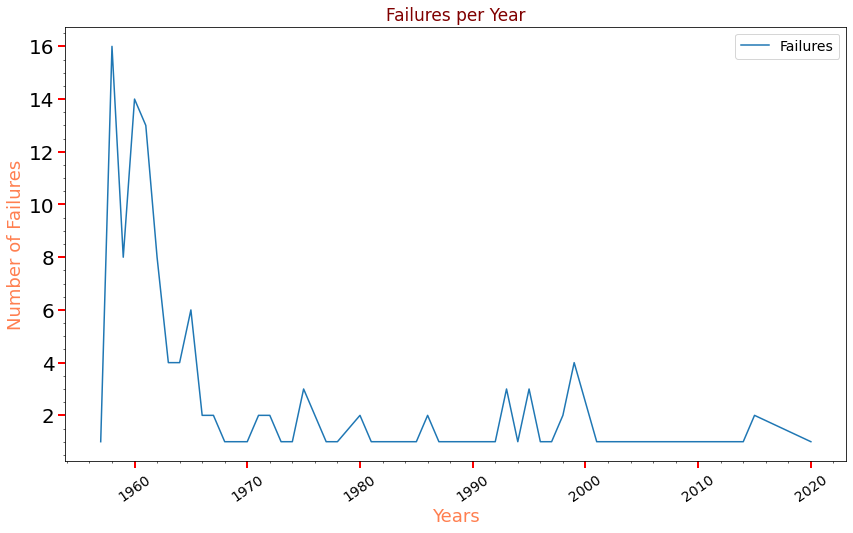

In [ ]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=35)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.plot(failures['Dates'], failures[0])
plt.legend(['Failures'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Number of Failures', fontsize=18, color='coral')
plt.tick_params(length=7, width=2, color='red')
plt.title('Failures per Year', fontsize=17, color='maroon')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
dates = []
locations = []
for d,data in df.iterrows():
    date = str(data['Date'].split(',')[1][:5][1:])
    loc = data['Location'].split(',')[-1][1:]
    if loc == 'USA':
        loc = 'USA'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Gran Canaria':
        loc = 'USA'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Pacific Missile Range Facility':
        loc = 'USA'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Russia':
        loc = 'Russia'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Kazakhstan':
        loc = 'Russia'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Yellow Sea':
        loc = 'China'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Barents Sea':
        loc = 'Russia'
        locations.append(loc)
        dates.append(date)
    elif loc == 'Shahrud Missile Test Site':
        loc = 'Iran'
        locations.append(loc)
        dates.append(date)
    elif loc == 'New Mexico':
        loc = 'USA'
        locations.append(loc)
        dates.append(date)
    else:
        locations.append(loc)
        dates.append(date)
data = {'Dates': dates, 'Countries': locations}
dataframe = pd.DataFrame(data, columns=['Dates', 'Countries'])
dataframe = dataframe.value_counts().to_frame().reset_index()
dataframe = dataframe.sort_values('Dates', ascending=True)
dataframe['Dates']
dataframe['Year'] = pd.to_datetime(dataframe['Dates']).dt.year
zero_counts = dataframe.groupby(['Year', 'Countries', 0]).size().reset_index(name='ZeroCount')
max_zero_countries = zero_counts.groupby('Year')[0].idxmax()
most_zero_per_year = zero_counts.loc[max_zero_countries]
most_zero_per_year.head(50)

,Year,Countries,0,ZeroCount
0,1957,Russia,2,1
3,1958,USA,23,1
5,1959,USA,16,1
7,1960,USA,30,1
9,1961,USA,43,1
11,1962,USA,60,1
12,1963,Russia,24,1
14,1964,Russia,36,1
17,1965,Russia,53,1
21,1966,Russia,51,1


In [ ]:
bar = px.bar(x=most_zero_per_year['Year'], y=most_zero_per_year[0], color=most_zero_per_year['Countries'], color_continuous_scale='tropic')
bar.update_layout(xaxis_title = 'Year', yaxis_title = 'Number of Launches', font_size=15, title_x=0.5)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
dates = []
locations = []
for d,data in df.iterrows():
    date = str(data['Date'].split(',')[1][:5][1:])
    locations.append(data['Organisation'])
    dates.append(date)
data = {'Dates': dates, 'Countries': locations}
dataframe = pd.DataFrame(data, columns=['Dates', 'Countries'])
dataframe = dataframe.value_counts().to_frame().reset_index()
dataframe = dataframe.sort_values('Dates', ascending=True)
dataframe['Dates']
dataframe['Year'] = pd.to_datetime(dataframe['Dates']).dt.year
zero_counts = dataframe.groupby(['Year', 'Countries', 0]).size().reset_index(name='ZeroCount')
max_zero_countries = zero_counts.groupby('Year')[0].idxmax()
most_zero_per_year = zero_counts.loc[max_zero_countries]
most_zero_per_year.head(50)

,Year,Countries,0,ZeroCount
0,1957,RVSN USSR,2,1
6,1958,US Navy,12,1
10,1959,US Air Force,10,1
15,1960,US Air Force,21,1
19,1961,US Air Force,23,1
23,1962,US Air Force,41,1
26,1963,RVSN USSR,24,1
30,1964,RVSN USSR,36,1
36,1965,RVSN USSR,53,1
42,1966,RVSN USSR,51,1


In [ ]:
bar = px.bar(x=most_zero_per_year['Year'], y=most_zero_per_year[0], color=most_zero_per_year['Countries'], color_continuous_scale='tropic')
bar.update_layout(xaxis_title = 'Year', yaxis_title = 'Number of Launches', font_size=15, title_x=0.5)